In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import warnings
warnings.filterwarnings('ignore')

import re
import jax.numpy as jnp
from jax import grad, jit, partial
import jax
import ticktack
from ticktack import fitting
from tqdm import tqdm
import emcee

import corner
rcParams['figure.figsize'] = (10.0, 5.0)

In [2]:
cbm = ticktack.load_presaved_model('Guttler14', production_rate_units = 'atoms/cm^2/s')
cf = fitting.CarbonFitter(cbm)
cf.load_data('400_BCE_Data_processed.csv', time_oversample=12)
cf.prepare_function(use_control_points=True, interp="gp")

In [3]:
params = jnp.array([1.64020496, 1.89753848, 2.01179489, 1.9785422 , 1.81363453,
       1.59947136, 1.48841209, 1.48488675, 1.55470805, 1.66057913,
       1.72097105, 1.78765711, 1.98009502, 2.24229633, 2.25534079,
       2.07390008, 2.09996162, 2.1624614 , 2.02154143, 1.89533406,
       2.29156256, 2.36281857, 2.10976963, 1.88188099, 1.92629082,
       1.86123407, 1.87932658, 1.97239226, 2.09059458, 2.42509554,
       2.24717411, 1.98034002, 2.15429256, 2.3680923 , 2.42892708,
       2.38856132, 2.24038707, 2.03315887, 1.93415563, 1.93665946,
       2.00306035, 2.09327783, 2.13070118, 2.12015296, 2.07284067,
       2.00072921, 1.96674321, 1.95691131, 1.95263047, 1.95951212,
       2.01101407, 2.15562078, 2.34533774, 2.41804187, 2.38966125,
       2.36644911, 2.36723508, 2.35487908, 2.30677972, 2.14512009,
       1.95696441, 2.0656364 , 2.36750192, 2.50107729, 2.468006  ,
       2.37943663, 2.23309733, 2.03400008, 1.83934691, 1.80763014,
       1.92377285, 2.11707142, 2.34033932, 2.50999497, 2.58184438,
       2.48033809, 2.23594208, 1.93972687, 1.69049792, 1.74216108,
       2.004313  , 2.13613745, 2.16634975, 2.27589915, 2.39505255,
       2.33938229, 2.1470738 , 1.97639435, 1.86876382, 1.90723507,
       2.04399432, 2.1059226 , 2.11458501, 2.20612467, 2.29357451,
       2.1206685 , 1.78798917, 1.668846  , 1.728371  , 1.79633104,
       1.85317522, 1.88585494, 1.89204024])

In [4]:
# params = cf.steady_state_production * jnp.ones((len(cf.control_points_time) + 1,))

In [5]:
cf.control_points_time

DeviceArray([-426, -425, -424, -423, -422, -421, -420, -419, -418, -417,
             -416, -415, -414, -413, -412, -411, -410, -409, -408, -407,
             -406, -405, -404, -403, -402, -401, -400, -399, -398, -397,
             -396, -395, -394, -393, -392, -391, -390, -389, -388, -387,
             -386, -385, -384, -383, -382, -381, -380, -379, -378, -377,
             -376, -375, -374, -373, -372, -371, -370, -369, -368, -367,
             -366, -365, -364, -363, -362, -361, -360, -359, -358, -357,
             -356, -355, -354, -353, -352, -351, -350, -349, -348, -347,
             -346, -345, -344, -343, -342, -341, -340, -339, -338, -337,
             -336, -335, -334, -333, -332, -331, -330, -329, -328, -327,
             -326, -325], dtype=int64)

In [6]:
cf.control_points_time.size

102

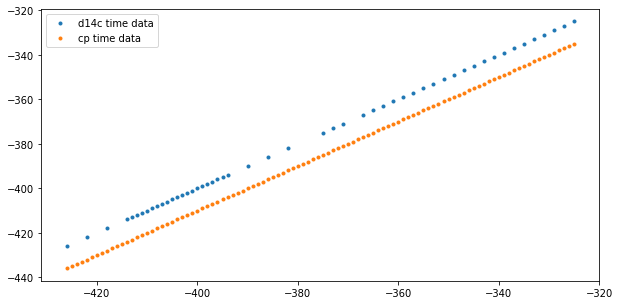

In [7]:
plt.plot(cf.time_data, cf.time_data, ".", label="d14c time data")
plt.plot(cf.control_points_time, cf.control_points_time -10, ".", label="cp time data")
plt.legend()

In [8]:
initial = params
burnin, production = 500, 1000
ndim, nwalkers = len(initial), 2*len(initial)
sampler = emcee.EnsembleSampler(nwalkers, ndim, cf.gp_sampling_likelihood)

print("Running burn-in...")
p0 = initial + 1e-5 * np.random.rand(nwalkers, ndim)
p0, lp, _ = sampler.run_mcmc(p0, burnin, progress=True);

Running burn-in...


100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [1:05:48<00:00,  7.90s/it]


In [9]:
print("Running production...")
sampler.reset()
sampler.run_mcmc(p0, production, skip_initial_state_check=True, progress=True);

Running production...


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [2:11:30<00:00,  7.89s/it]


In [10]:
mean = np.mean(sampler.flatchain, axis=0)

In [11]:
mean

array([1.66226873, 1.89020693, 2.01203257, 1.96122107, 1.84765167,
       1.60653461, 1.52340715, 1.46154502, 1.56253685, 1.64815698,
       1.74360858, 1.75972105, 2.0231116 , 2.2799001 , 2.29867526,
       2.04099423, 2.05600392, 2.16120895, 2.06475195, 1.89101653,
       2.29350728, 2.34913424, 2.11202931, 1.86345258, 1.92495701,
       1.83255673, 1.86706875, 1.99761943, 2.08236249, 2.39554678,
       2.26645997, 1.97661912, 2.05761713, 2.37056823, 2.43770379,
       2.41075729, 2.21113372, 2.03622699, 1.97614755, 1.96835817,
       2.03402204, 2.07243857, 2.12919939, 2.14023527, 2.07542097,
       2.01326962, 1.99257912, 1.97625046, 1.93601586, 1.92573647,
       2.07903612, 2.17222539, 2.33362591, 2.44841364, 2.39748237,
       2.36749933, 2.39502308, 2.31899555, 2.30906523, 2.11406426,
       1.91077985, 2.10936396, 2.35399001, 2.48594581, 2.43680012,
       2.38845629, 2.220485  , 2.05745146, 1.86128042, 1.82033554,
       1.92084084, 2.07588282, 2.32917185, 2.50016098, 2.61281

In [12]:
std = np.std(sampler.flatchain, axis=0)

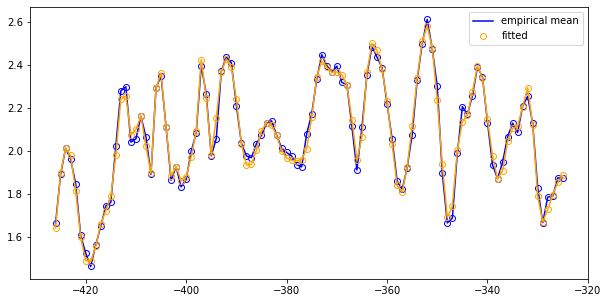

In [13]:
d14c = cf.dc14(params=mean)
d14c_fine = cf.dc14_fine(params=mean)
# plt.errorbar(cf.control_points_time, mean[:-1], yerr=std[:-1], fmt=".k", label="empirical error")
plt.plot(cf.control_points_time, mean[:-1], "bo", fillstyle="none")
plt.plot(cf.control_points_time, mean[:-1], color="b", label="empirical mean")
plt.plot(cf.control_points_time, params[:-1], 'o', color="orange", fillstyle="none", label="fitted")
plt.plot(cf.control_points_time, params[:-1], color="orange")
plt.legend()

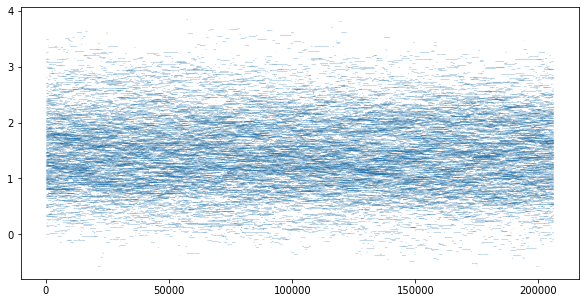

In [22]:
plt.plot(sampler.flatchain[:, 7], ".", markersize=0.09)

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.59it/s]


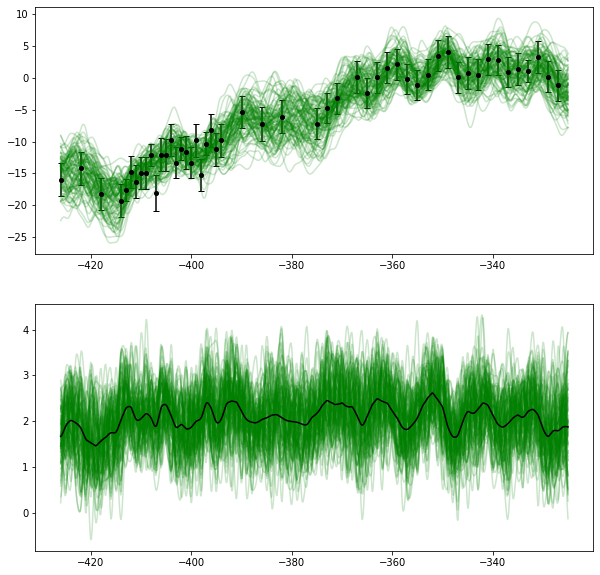

In [36]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))
n = 100
top_n = np.random.permutation(len(sampler.flatchain))[:n]
ax1.errorbar(cf.time_data[:-1], cf.d14c_data[:-1], yerr=cf.d14c_data_error[:-1], 
             fmt="o", color="k", fillstyle="full", capsize=3, markersize=4)
for i in tqdm(top_n):
    d14c = cf.dc14_fine(params=sampler.flatchain[i, :])
    ax1.plot(cf.time_grid_fine, d14c, color="g", alpha=0.2)
    control_points_fine = cf.production(cf.time_grid_fine, (sampler.flatchain[i, :],))
    ax2.plot(cf.time_grid_fine, control_points_fine, color="g", alpha=0.2)
control_points_fine = cf.production(cf.time_grid_fine, (mean,))
ax2.plot(cf.time_grid_fine, control_points_fine, "k")

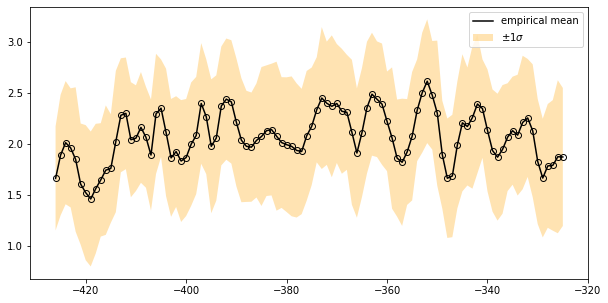

In [46]:
std = np.std(sampler.flatchain, axis=0)
plt.fill_between(cf.control_points_time, mean[:-1]+std[:-1], mean[:-1]-std[:-1], 
                 color='orange', alpha=0.3, edgecolor='none', label='$\pm 1\sigma$')
plt.plot(cf.control_points_time, mean[:-1], color="k", label="empirical mean")
plt.plot(cf.control_points_time, mean[:-1], "ko", fillstyle="none")
plt.legend()

In [16]:
sample = sampler.flatchain[:, 10:17]

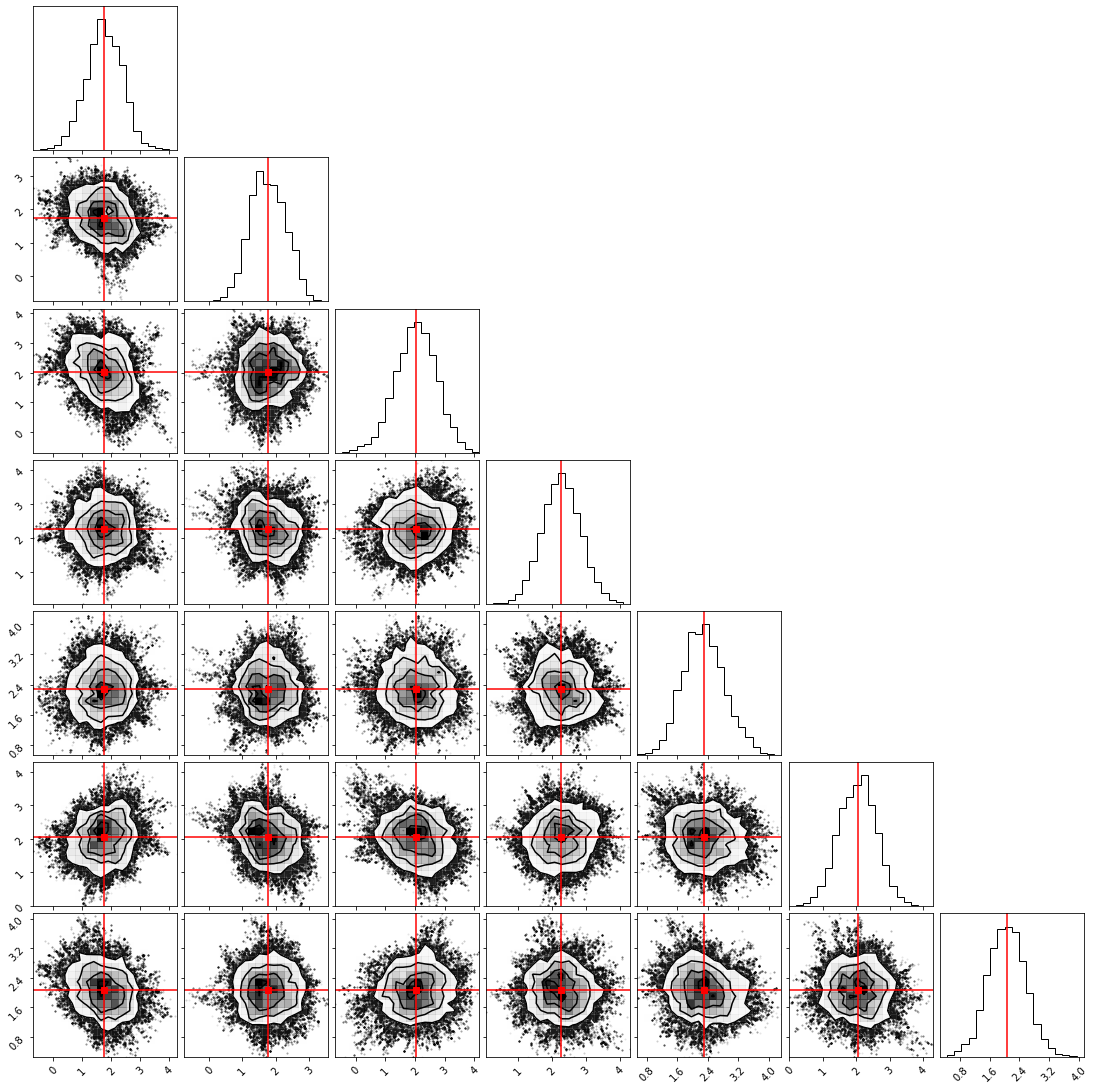

In [17]:
ndim = sample.shape[1]
figure = corner.corner(sample)
value = np.mean(sample, axis=0)
axes = np.array(figure.axes).reshape((ndim, ndim))
for i in range(ndim):
    ax = axes[i, i]
    ax.axvline(value[i], color="r")

for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(value[xi], color="r")
        ax.axhline(value[yi], color="r")
        ax.plot(value[xi], value[yi], "sr")